<a href="https://colab.research.google.com/github/e46537303-ui/Finanzas-Proyecto1/blob/main/An%C3%A1lisis_de_Riesgo_Crediticio_en_el_Sector_Financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQQv19sYf-SfZOG2VTlerwbIXDgZ3kLV5Ur6OtSCekbtAHXWR3qiWcb9w_5FO-fg8IJsQlQiJ0IVL6d/pub?output=csv')
print(df)

      mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro   ingreso  \
0        0     235  FAMILIAR    30      3748    93.0             5   3500.00   
1        0      18  FAMILIAR    32      4598     9.0            12    900.00   
2        0       0  FAMILIAR    26      5148     8.0             2   2400.00   
3        0       0  FAMILIAR    36      5179    20.0            12   2700.00   
4        0       0  FAMILIAR    46      3960     NaN             1   3100.00   
...    ...     ...       ...   ...       ...     ...           ...       ...   
8394     0       0    PROPIA    43      7917   106.0            12  13660.00   
8395     1       0  FAMILIAR    29      3352    25.0             0    813.00   
8396     0       0  FAMILIAR    32      6821    19.0            12   3000.00   
8397     1       0    PROPIA    38      3882     7.0            12   3069.23   
8398     0       0  FAMILIAR    36      5909    51.0            12   3500.00   

       linea_sf  deuda_sf  score       

Preguntas clave del negocio (Sector Finanzas)

¿Qué perfil de cliente presenta mayor riesgo de incumplimiento?

¿Cómo se distribuye el score crediticio en la cartera?

¿La relación deuda/ingreso (DTI) influye en la mora?

¿Existen montos o productos más riesgosos que otros?

¿Qué variables son más útiles para construir un modelo predictivo?

Etapa 1 – Obtención y Preparación de Datos (SQL)

In [2]:
nulos = df.isnull().sum()
nulos

,0
mora,0
atraso,0
vivienda,0
edad,0
dias_lab,0
exp_sf,1830
nivel_ahorro,0
ingreso,0
linea_sf,1127
deuda_sf,461


Revisar la distribución de cada variable con nulos

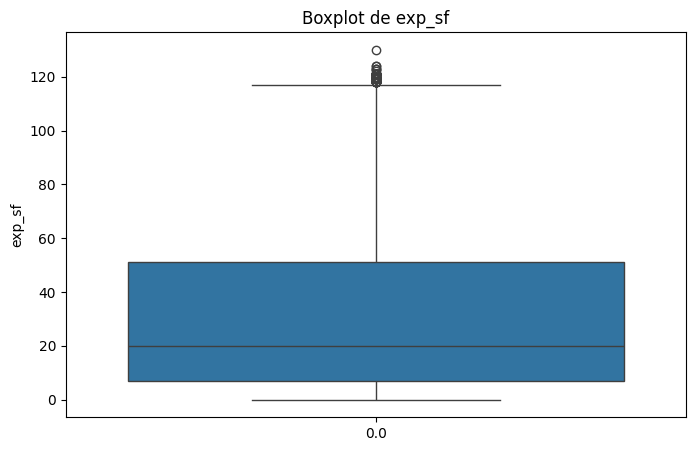

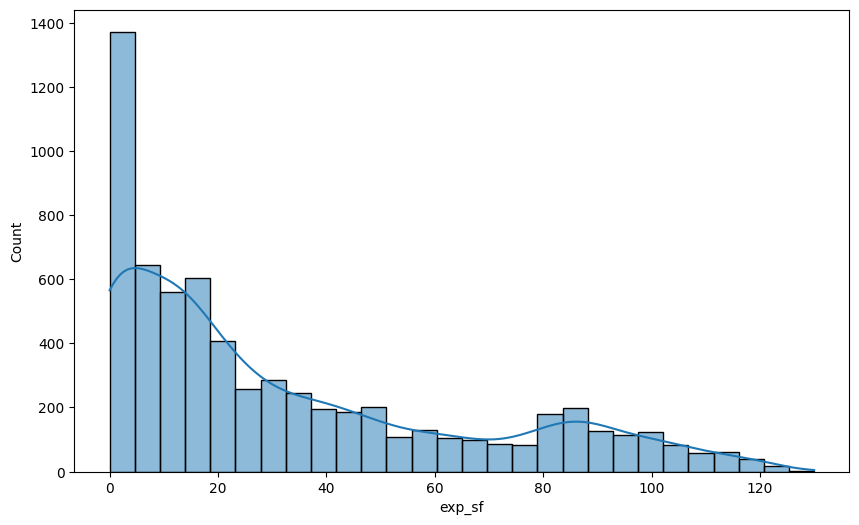

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['exp_sf'].describe().round(2)

plt.figure(figsize=(8, 5))
sns.boxplot(x=np.zeros(len(df)), y=df['exp_sf'])
plt.ylabel('exp_sf')
plt.xlabel('')
plt.title('Boxplot de exp_sf')
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df['exp_sf'], kde=True)
plt.show()



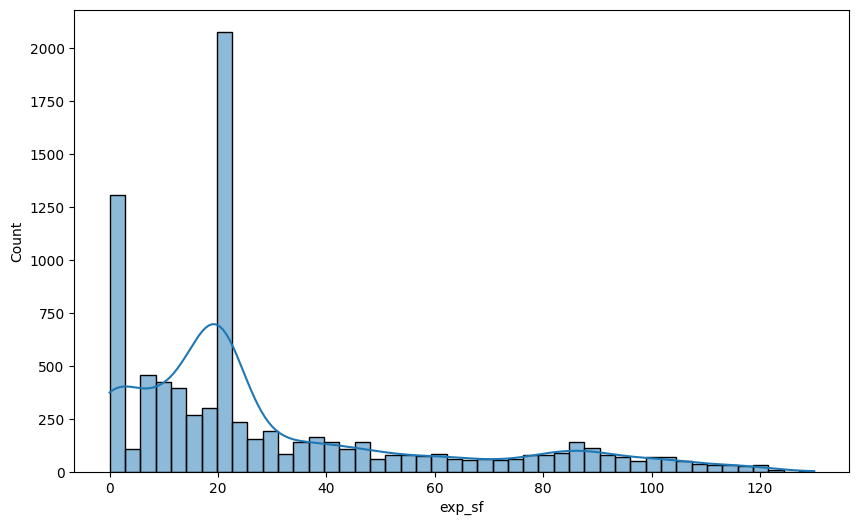

In [26]:
df['exp_sf'] = df['exp_sf'].fillna(df['exp_sf'].median())
df['exp_sf'].describe().round(2)

plt.figure(figsize=(10,6))
sns.histplot(df['exp_sf'], kde=True)
plt.show()

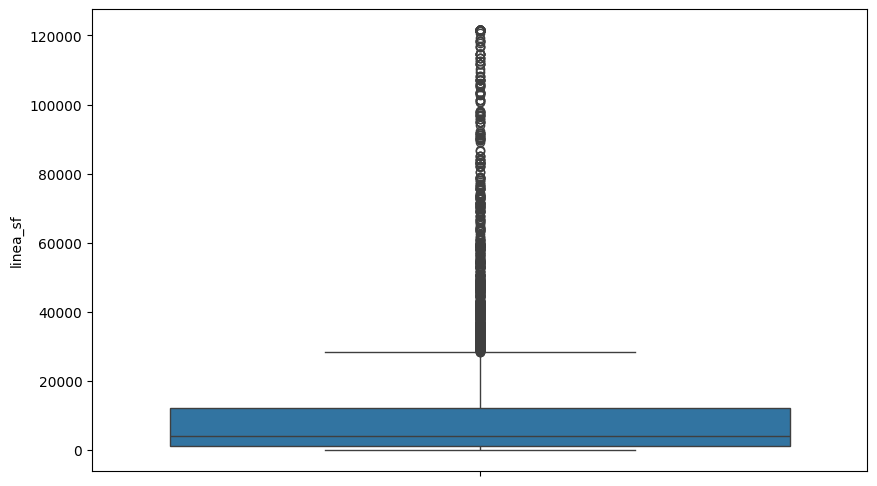

In [14]:
df["linea_sf"].describe().round(2)
plt.figure(figsize=(10,6))
sns.boxplot(y=df["linea_sf"])
plt.show()

In [8]:
df["deuda_sf"].describe().round(2)

,deuda_sf
count,7938.00
mean,6110.72
std,11177.99
min,0.00
25%,478.32
50%,2258.76
75%,5755.15
max,57094.38
